In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv('SMSSpamCollection.txt', delimiter = "\t")
dataframe.columns = ["label", "message"]

### Data description
- Dataset with 5571 entries. 
- Total of 4,824 SMS messages.
- 4825 legitimate and 747 spam messages.
- label: can be ham for legitimate or spam.
- message: the message text.

In [3]:
dataframe

label                                            message
0      ham                      Ok lar... Joking wif u oni...
1     spam  Free entry in 2 a wkly comp to win FA Cup fina...
2      ham  U dun say so early hor... U c already then say...
3      ham  Nah I don't think he goes to usf, he lives aro...
4     spam  FreeMsg Hey there darling it's been 3 week's n...
...    ...                                                ...
5566  spam  This is the 2nd time we have tried 2 contact u...
5567   ham               Will ü b going to esplanade fr home?
5568   ham  Pity, * was in mood for that. So...any other s...
5569   ham  The guy did some bitching but I acted like i'd...
5570   ham                         Rofl. Its true to its name

[5571 rows x 2 columns]

### There is no null fields.

In [4]:
dataframe.isnull().sum()

label      0
message    0
dtype: int64

In [5]:
dataframe.describe()

label                 message
count   5571                    5571
unique     2                    5168
top      ham  Sorry, I'll call later
freq    4824                      30

In [6]:
dataframe.head()

label                                            message
0   ham                      Ok lar... Joking wif u oni...
1  spam  Free entry in 2 a wkly comp to win FA Cup fina...
2   ham  U dun say so early hor... U c already then say...
3   ham  Nah I don't think he goes to usf, he lives aro...
4  spam  FreeMsg Hey there darling it's been 3 week's n...

In [7]:
dataframe.tail()

label                                            message
5566  spam  This is the 2nd time we have tried 2 contact u...
5567   ham               Will ü b going to esplanade fr home?
5568   ham  Pity, * was in mood for that. So...any other s...
5569   ham  The guy did some bitching but I acted like i'd...
5570   ham                         Rofl. Its true to its name

### Data distribution.

<Figure size 576x432 with 0 Axes>

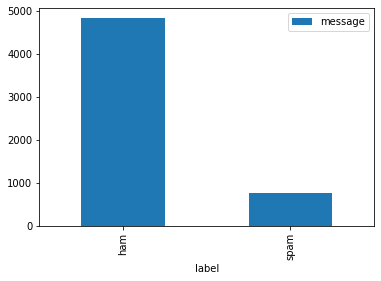

In [8]:
import matplotlib.pyplot as plt

graphic = plt.figure(figsize=(8,6))
dataframe.groupby('label').count().plot.bar(ylim=0)
plt.show()

### Split the dataset into training and test.

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataframe, test_size=0.3, random_state=42)

In [10]:
X_train = train.message
X_test = test.message

In [11]:
X_train

4712    Thats cool princess! I will cover your face in...
5028    Go chase after her and run her over while she'...
4920     G says you never answer your texts, confirm/deny
2110                  Do we have any spare power supplies
2273                               Cold. Dont be sad dear
                              ...                        
3772                Does uncle timi help in clearing cars
5191    Oh oh... Den muz change plan liao... Go back h...
5226    I re-met alex nichols from middle school and i...
5390                              Watching ajith film ah?
860                   In work now. Going have in few min.
Name: message, Length: 3899, dtype: object

In [12]:
X_test

1168    Ok . . now i am in bus. . If i come soon i wil...
765     UR awarded a City Break and could WIN a £200 S...
465     great princess! I love giving and receiving or...
1117    449050000301 You have won a £2,000 price! To c...
4934                    Hey do you want anything to buy:)
                              ...                        
2678    Was playng 9 doors game and gt racing on phone...
4974    Aiyo u so poor thing... Then u dun wan 2 eat? ...
650     Thats cool! Sometimes slow and gentle. Sonetim...
4462    Sorry I flaked last night, shit's seriously go...
708     To review and KEEP the fantastic Nokia N-Gage ...
Name: message, Length: 1672, dtype: object

### The possible categories.

In [13]:
categories = ["ham", "spam"]
categories

['ham', 'spam']

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

In [41]:
X_train_counts.shape

(3899, 7291)

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [44]:
X_train_tfidf

<3899x7291 sparse matrix of type '<class 'numpy.float64'>'
	with 51850 stored elements in Compressed Sparse Row format>

### Running ML algorithms.
#### MultinomialNB
- Based on the Bayes theorem.
- Is a set supervised learning algorithms based on applying Bayes. 
#### TfidfVectorizer
- First we need to transform the raw text into computable data to feed the algorithm.
- Using TF, each word is waighted and that weight is related to the frequency of that word in the text.
- Using IDF, this method normalize the weight of frequent terms like "is", "it", "in" etc.
- The TfidfVectorizer used in the Pipeline make that transformation.
#### OneVsRestClassifier
- OneVsRestClassifier is a classification algorithm that uses binary heuristic for multi-class classification.
#### Pipeline
- Pipeline is a way to automate the processes.
#### stopwords
- stopwords is our set of commom words to be normalized.

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score

stop_words = set(stopwords.words('english'))

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words, use_idf=True)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None)))])

NB_pipeline.fit(X_train, train['label'])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...})),
                ('clf', OneVsRestClassifier(estimator=MultinomialNB()))])

### Analysing performance.

In [23]:
prediction = NB_pipeline.predict(X_test)
'Test accuracy is {}'.format(accuracy_score(test['label'], prediction))

'Test accuracy is 0.9766746411483254'

In [17]:
not_spam = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

In [18]:
is_spam = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [19]:
arbitrary_message = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005."

In [20]:
predict_not_spam = NB_pipeline.predict([not_spam])
predict_not_spam

array(['ham'], dtype='<U4')

In [21]:
predict_is_spam = NB_pipeline.predict([is_spam])
predict_is_spam

array(['spam'], dtype='<U4')

In [29]:
predict_arbitrary_message = NB_pipeline.predict([arbitrary_message])
predict_arbitrary_message

array(['spam'], dtype='<U4')